In [8]:
import numpy as np
import pandas as pd

from math import dist

In [9]:
# unused
class Grid:

    def __init__(self, grid: pd.DataFrame) -> None:
        self.grid = grid

In [18]:
class Node:
    def __init__(self, grid: pd.DataFrame, coordinates: tuple, logo: str) -> None:
        self.coordinates = coordinates
        self.logo = logo
        # type could be an enum
        self.placeOnGrid(grid)
    
    def placeOnGrid(self, dataframe):
        row,col = self.coordinates
        dataframe[row][col] = self.logo

class Building(Node):

    def __init__(self, grid: pd.DataFrame, coordinates: tuple, logo: str) -> None:
        super().__init__(grid, coordinates, logo)
    

In [11]:
class Road:

    def __init__(self, connected_buildings: list, lanes: int, cylcing_lanes: int, bidirectional=True) -> None:
        pass

In [12]:
height = 10
width = 15

In [13]:
grid_base = [['.' for j in range(width)] for i in range(height)]
grid = pd.DataFrame(grid_base)
grid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
8,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
9,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [20]:
shop = Building(grid, (7, 4), 'S')
home = Building(grid,(10, 8), 'H')
work = Building(grid, (7, 8), 'W')

grid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.,S,.,.,.,.,.,.,.
5,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
7,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
8,.,.,.,.,.,.,.,W,.,.,H,.,.,.,.
9,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


this could be a solution for properly shaped arrays ..?

In [ ]:
#import coo from sparse
#from scipy.sparse import coo_matrix


In [ ]:
# use physics module for the calculation
# https://fangohr.github.io/blog/physical-quantities-numerical-value-with-units-in-python.html

Create Person and walk

In [ ]:
from random import randint


class Person:

    def __init__(self, grid: pd.DataFrame, km_per_h=5) -> None:
        self.position = (randint(0, grid.shape[0]), randint(0, grid.shape[1]))
        self.km_per_h = km_per_h

    def walk(self, destination: Location):
        distance = dist(self.position, destination.coordinates)
        print(f'The distance is {distance: 0.2f} metres.')
        self.position = destination.coordinates
        print(f'This took {(distance/1000)/(self.km_per_h/3.6) * 60: 0.2f} minutes')


In [ ]:
adriana = Person(grid)
adriana.position

(8, 5)

In [ ]:
adriana.walk(shop)
adriana.position

The distance is  1.41 metres.
This took  0.06 minutes


(7, 4)

### General networkx

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.Graph()
G.add_node(1, label="Node 1")
G.add_node(2)
G.add_node(3)
G.add_node(4)

In [ ]:
# You can also add attributes to the nodes and edges, such as weights or labels:
G.add_edge(1, 2, weight=0.1)
G.add_edge(2, 3, weight=1)
G.add_edge(2, 4, weight=5)

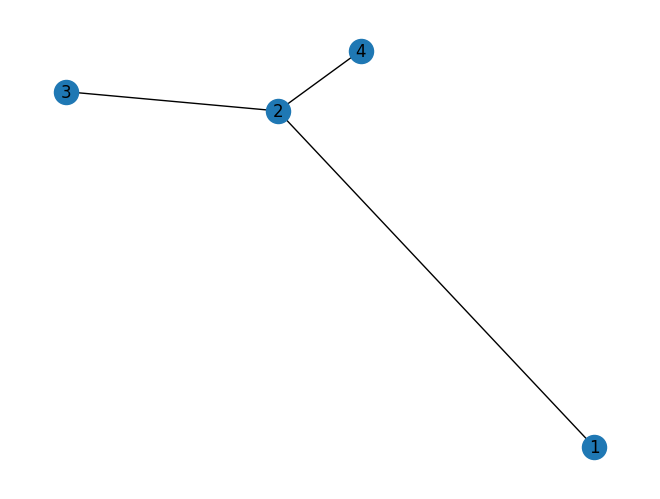

In [ ]:
nx.draw(G, with_labels=True)
plt.show()

### More specific networkx

In [28]:
grid_graph = nx.Graph()

grid_graph.add_node(1, label="SHOP")
grid_graph.add_node(2, label="HOME")

grid_graph.add_edge(2, 1, weight=1)


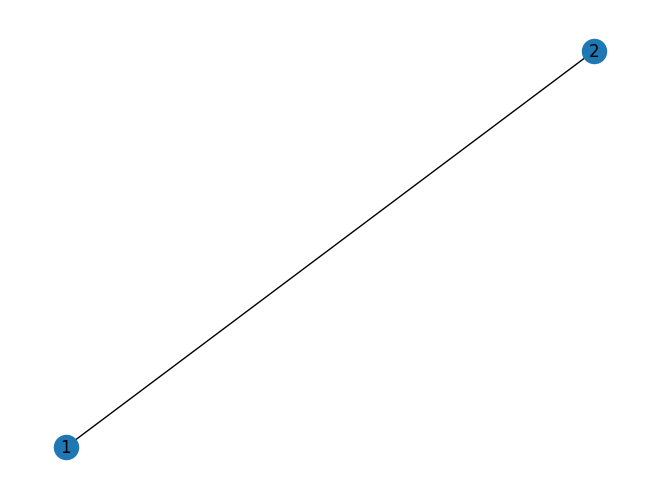

In [29]:
nx.draw(grid_graph, with_labels=True)
plt.show()

In [31]:
grid_graph.nodes[1]

{'label': 'SHOP'}

### Another ChatGPT hint

In [ ]:
class GPTEdge:
    def __init__(self, num_lanes, speed_limit, lane_data):
        self.num_lanes = num_lanes
        self.speed_limit = speed_limit
        self.lane_data = lane_data

# Example usage:
edge = GPTEdge(4, 30, {'left_lane': {'type': 'car', 'direction': 'two_way'},
                         'right_lane': {'type': 'bike', 'direction': 'one_way'}})

# Access lane data:
print(edge.lane_data['left_lane']['type'])  # Output: 'car'


This will need a lot of improvement. I need speed for specific lanes. But the dictionary approch is nice

You can then create a Street class that combines multiple Lane objects into a single street, and stores information about the parking availability along the street.

To account for the fact that pedestrians can walk around freely while cars and bikes need parking, you can use a **boolean attribute** on the Lane class to indicate whether parking is allowed on that lane. You can then use this attribute to determine where cars and bikes are allowed to park along the street.

Using a network of layers for "walking exits" and computing the euclidean distance between "walking spots" could be a good way to model the movement of pedestrians within the street network. However, it's important to consider the complexity of this approach and whether it is necessary for your use case. You may be able to achieve your goals with a simpler approach, such as just using a single layer for the street network and storing the availability of pedestrian walkways as an attribute on the edges of the graph.
stadtblickfenster@gmail.com
Can you list all types of destination that are walkable in this scenario? I want to use them  as nodes

In the context of a street network, destinations that are walkable might include:

Intersections: These could be represented as nodes in the graph, and could be walkable destinations for pedestrians.

Sidewalks: These are typically located along the edges of the street and provide a space for pedestrians to walk. You could represent sidewalks as nodes in the graph, or as edges connecting the intersections.

Crosswalks: These are areas of the street where pedestrians are allowed to cross from one side of the road to the other. You could represent crosswalks as nodes in the graph, or as edges connecting the intersections.

Bus stops: These are locations where pedestrians can wait for a bus. You could represent bus stops as nodes in the graph.

Train stations: These are locations where pedestrians can access train transportation. You could represent train stations as nodes in the graph.

Other public transportation hubs: These could include locations such as subway stations, ferry terminals, or airports, which are walkable destinations for pedestrians. You could represent these as nodes in the graph.

Buildings: These could include buildings such as homes, offices, stores, or other destinations that pedestrians might want to walk to. You could represent buildings as nodes in the graph.

Parks: These are public spaces that are typically walkable and may be destinations for pedestrians. You could represent parks as nodes in the graph.

It's important to note that the specific walkable destinations that you include in your street network will depend on the needs and goals of your application. You may want to consider adding additional types of destinations, or omitting some of the destinations listed above, depending on your use case.

In [131]:
from enum import Enum

# idea
# the name lane sucks. I need something that says: "I can have more than 1 lane"
class Lane:

    def __init__(self, lane_type: Enum, lane_number: int, speedlimit: int, bidirectional: bool) -> None:
        self.lane_type = lane_type
        self.lane_number = lane_number
        self.speedlimit = speedlimit
        self.bidirectional = bidirectional

class StreetSection: # make streets out of these action?

    def __init__(self, lanes: dict, parking: bool) -> None:
        # if dictionary turns out to be a bad idea, I can ask ChatGPT how to use defaultdict from collections for this
        self.lanes = lanes if lanes is not None else {'car':None}
        self.parking = parking
    
    def confirmLanetype(self, desired_lane_type) -> bool:
        return desired_lane_type in self.lanes.keys()
    
    def add_lane(self, lane_type, speed, bi_dir=True):
        self.lanes[lane_type] = Lane(lane_type=lane_type, lane_number=2, speedlimit=speed, bidirectional=bi_dir)
    
    def remove_lane(self):
        pass

    def add_vehicle(self):
        pass
    def remove_vehicle(self):
        pass


In [133]:
bike_lane = Lane('bike', 1, 25, True)
bike_lane.lane_type
street = StreetSection({'bike': bike_lane, 'car': None}, parking=False)
street2 = StreetSection(None, True)

# street.confirmLanetype(desired_lane_type='bike')
street2.confirmLanetype(desired_lane_type='bike')




False

In [3]:
test  ={'a': 1, 'b': 2, 'c': 3}
test.items()

for x,y in test.items():
    print(x, y)

a 1
b 2
c 3


### Implementing another draft

In [123]:
import pandas as pd
import numpy as np
height = 25
width = 18

In [111]:
grid_base = [['.' for j in range(width)] for i in range(height)]
grid = pd.DataFrame(grid_base)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (grid)


   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17
0   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
1   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
2   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
3   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
4   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
5   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
6   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
7   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
8   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
9   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
10  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
11  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
12  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
13  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
14  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
15  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .
16  .  .  .  .  .  .  .  .  .  

In [112]:
grid.loc[:,(2, 7, 16)] = 'I'
grid.loc[(3, 9, 15,16, 21),:] = '–'

grid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
1,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
2,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
3,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–
4,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
5,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
6,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
7,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
8,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
9,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–


In [119]:
from random import randint

x  = [randint(0,height-1) for i in range(20)]
y  = [randint(0,width-1) for i in range(20)]

x, y

([4, 12, 7, 16, 0, 16, 10, 2, 23, 5, 12, 7, 18, 3, 12, 12, 5, 22, 23, 1],
 [6, 17, 6, 6, 15, 11, 14, 0, 9, 7, 4, 1, 10, 3, 17, 2, 8, 14, 2, 17])

In [120]:
grid.loc[x[1], y[1]]
grid.loc[17, 1]

'.'

In [121]:
for x_cord, y_cord in zip(x, y):
        if grid.loc[x_cord,y_cord] == 'I' or grid.loc[x_cord,y_cord] == '–':
            pass
        else:
            grid.loc[x_cord,y_cord] = 'o'

grid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,o,I,.
1,.,o,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,o
2,o,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
3,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–
4,.,.,I,.,.,.,o,I,.,.,.,.,.,.,.,.,I,.
5,.,.,I,.,.,.,.,I,o,.,.,.,.,.,.,.,I,.
6,.,.,I,.,.,.,.,I,.,.,.,.,.,.,.,.,I,.
7,.,o,I,.,.,.,o,I,.,.,.,.,.,.,.,.,I,.
8,.,o,I,o,.,.,.,I,.,.,.,.,.,.,.,.,I,.
9,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–


In [125]:
np.where(np.array(grid)=='o')

(array([ 0,  1,  1,  2,  4,  5,  7,  7,  8,  8, 10, 12, 12, 13, 18, 22, 23,
        23, 24]),
 array([15,  1, 17,  0,  6,  8,  1,  6,  1,  3, 14,  4, 17,  1, 10, 14,  1,
         9,  6]))